# Graphs for frontend

In [54]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
!pwd

/Users/maryward/code/ivanthung_deep_pv/deep-pv-frontend


In [6]:
!ls

Dockerfile       Procfile         node_modules     setup.py
Graphs.ipynb     README.md        raw_data         setup.sh
MANIFEST.in      deep_pv_frontend requirements.txt test.html
Makefile         first_try.json   scripts          tests


In [10]:
#import data
#preloaded data
with open("first_try.json") as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()
preloaded = jsonObject
len(preloaded)

2

In [12]:
#transform json to df
results = preloaded['results']
df = pd.DataFrame(results)
df.head()

,name,mask,score,bb_latlon,lat,lon,area,area_correction,kWh_mon
0,51.924155_4.4771.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.859764,"[[4.4769300520420074, 51.92414235506346], [4.4...",51.924074,4.476997,52.284180,94.158276,1256.150851
1,51.924155_4.477272.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.961754,"[[4.4772230833768845, 51.924154967813365], [4....",51.924131,4.477139,9.401367,16.930868,225.872060
2,51.924155_4.477444.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.948252,"[[4.4774869456887245, 51.92415331368223], [4.4...",51.924134,4.477497,10.661133,19.199572,256.138494
3,51.924155_4.477444.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.928996,"[[4.477454423904419, 51.924142975362635], [4.4...",51.924147,4.477469,1.877930,3.381953,45.118102
4,51.924261_4.477272.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.850616,"[[4.477103389799595, 51.92423457268702], [4.47...",51.924241,4.477118,3.437500,6.190574,82.587478


In [130]:
bb = [{
        'name': s['name'],
        'lat': s['lat'],
        'lon': s['lon'],
        'area': s['area']
        } for s in results ]

In [133]:
pd.DataFrame(bb).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    17 non-null     object 
 1   lat     17 non-null     float64
 2   lon     17 non-null     float64
 3   area    17 non-null     float64
dtypes: float64(3), object(1)
memory usage: 672.0+ bytes


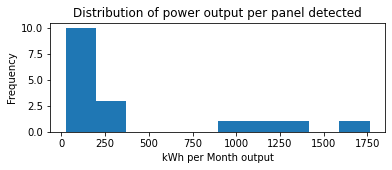

In [14]:
#make basic histogram
fig, ax = plt.subplots(figsize=(6, 2))
ax.hist(pd.DataFrame(results)['kWh_mon'].apply(round), bins = 10)
plt.title("Distribution of power output per panel detected")
plt.xlabel('kWh per Month output')
plt.ylabel('Frequency')
plt.show()
#col1.pyplot(fig)


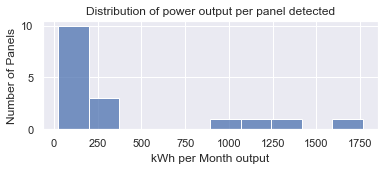

In [67]:
#make with seaborn
data = pd.DataFrame(results)['kWh_mon'].apply(round)
fig, ax = plt.subplots(figsize=(6, 2))
sns.set_theme(style="darkgrid")
#sns.set(rc={'axes.facecolor':'lemonchiffon', 'figure.facecolor':'white'})
#palette = sns.color_palette("YlOrBr", as_cmap=True)
#sns.set_palette('husl', n_colors = 5, desat=True, color_codes=True) #'hsl' 
ax = sns.histplot( data=data, bins = 10, palette=palette )
# sns.set_theme(style="white")
# ax = sns.histplot( data=data, bins = 10 )
# sns.set_theme(style="ticks")
# ax = sns.histplot( data=data, bins = 10 )
plt.title("Distribution of power output per panel detected")
plt.xlabel('kWh per Month output')
plt.ylabel('Number of Panels')
plt.show()

{'axes.facecolor': '#FF5733',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

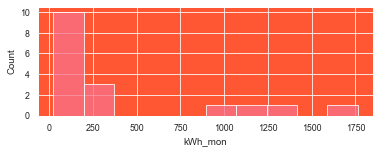

In [103]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.set_palette('husl', n_colors = 5, desat=True, color_codes=True) #'hsl' 
ax = sns.histplot( data=data, bins = 10, palette=palette )
sns.axes_style()

In [88]:
sns.axes_style()

{'axes.facecolor': '#FF5733',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Text(0, 0.5, 'Number of Panels')

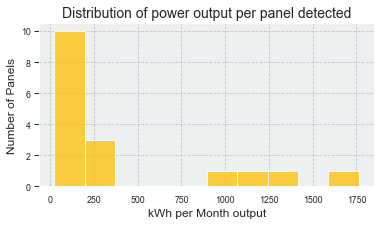

In [129]:
fig, ax = plt.subplots(figsize=(6, 3))
#set figure aesthetic
sns.set(rc={'axes.facecolor':'#ECF0F1', 'figure.facecolor':'white','patch.edgecolor': 'w', 'grid.linestyle': '--', 'ytick.left': True, 'grid.color': '#BDC3C7'})
sns.set_context("paper") #resolution of image
 # use this to change bar color
#plot elements
ax = sns.histplot( data=data, bins = 10, color = '#FFBF00' )
plt.title("Distribution of power output per panel detected", fontsize = 14)
plt.xlabel('kWh per Month output', fontsize = 12)
plt.ylabel('Number of Panels', fontsize = 12)
#display on streamlit

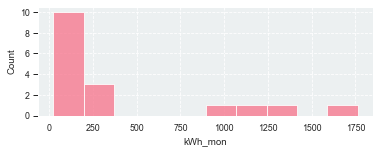

In [111]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.set_palette('husl', n_colors = 5, desat=True, color_codes=True)
ax = sns.histplot( data=data, bins = 10, palette=palette )

In [73]:
#with plotly 
#streamlit wrapper st.plotly_chart(figure_or_data, use_container_width=False, sharing="streamlit", **kwargs)
#fig, ax = plt.subplots(figsize=(6, 2))
df = pd.DataFrame(results)
fig = px.histogram(df, nbins = 10, x='kWh_mon', 
                title="Distribution of power output per panel detected")
fig.show()